In [67]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime as dt
import math

import matplotlib.pyplot as plt


In [3]:
def const_binomial_tree(n):
    for i in range(n):
        x = [1, 0, 1]
        for j in range(i):
            x.append(0)
            x.append(1)
        x = np.array(x) + i
        y = np.arange(-(i+1), i+2)[::-1]
        #y = np.arange(n-1-i, n+2+i)[::-1]
        plt.plot(x, y, 'bo-')
    plt.show()

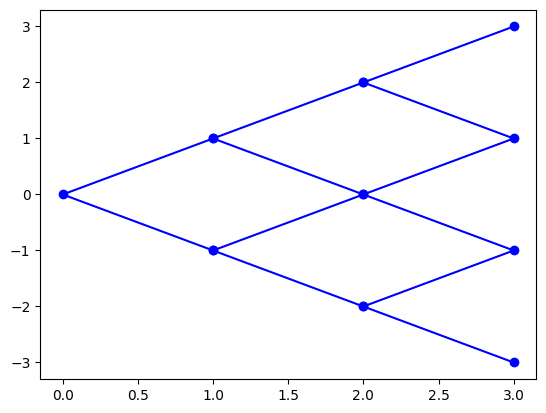

In [4]:
const_binomial_tree(3)

## Inputs

In [5]:
T = 1
n = 10
dt = T / n
r = 0.05 * T
m = 1+r
u = 1.1
d = 1/1.1
p = (1+r-d)/(u-d)
q = 1-p
s0 = 100
K = 100
option_type = 'P'

## Binomial tree

In [6]:
def binomial_tree(n, u, d, s0):
    prices = np.zeros((n+1, n+1))
    prices[0, 0] = s0
    for i in range(1, n+1):
        prices[0:i, i] = prices[0:i, i-1] * u
        prices[i, i] = prices[i-1, i-1] * d
    return prices

In [7]:
stock_prices = binomial_tree(n, u, d, s0)
stock_prices

array([[100.        , 110.        , 121.        , 133.1       ,
        146.41      , 161.051     , 177.1561    , 194.87171   ,
        214.358881  , 235.7947691 , 259.37424601],
       [  0.        ,  90.90909091, 100.        , 110.        ,
        121.        , 133.1       , 146.41      , 161.051     ,
        177.1561    , 194.87171   , 214.358881  ],
       [  0.        ,   0.        ,  82.6446281 ,  90.90909091,
        100.        , 110.        , 121.        , 133.1       ,
        146.41      , 161.051     , 177.1561    ],
       [  0.        ,   0.        ,   0.        ,  75.13148009,
         82.6446281 ,  90.90909091, 100.        , 110.        ,
        121.        , 133.1       , 146.41      ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         68.30134554,  75.13148009,  82.6446281 ,  90.90909091,
        100.        , 110.        , 121.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  62.09213231,  68.3

In [8]:
def draw_bin_tree(n, u, d, s0):
    tree = binomial_tree(n, u, d, s0)
    y = []
    for i in range(n+1):
        for j in tree[:, i]:
            if j != 0:
                y.append((j, i))
    y = np.array(y)
    plt.scatter(y[:, 1], y[:, 0])

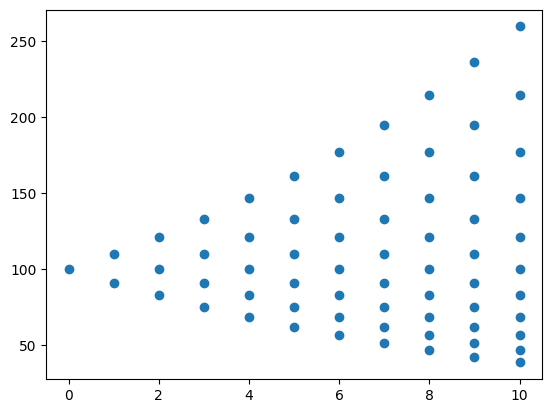

In [9]:
draw_bin_tree(n, u, d, s0)

## Option payoff at maturity

In [10]:
def option_maturity_payoffs(stock_prices, K, option_type):
    if option_type == 'C':
        payoffs = stock_prices[:, len(stock_prices)-1] - K
    else:
        payoffs = K - stock_prices[:, len(stock_prices)-1]
    for j in range(len(payoffs)):
        payoffs[j] = max(0, payoffs[j])
    return payoffs

In [11]:
maturity_payoff = option_maturity_payoffs(stock_prices, K, option_type)
maturity_payoff

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 17.3553719 , 31.69865446, 43.55260699, 53.34926198,
       61.44567106])

### Backward recursion to determine option price at time 0

In [12]:
def backward_payoffs(n, r, p, stock_prices, maturity_payoff):
    back_option_payoffs = np.zeros((n+1, n+1))
    back_option_payoffs[:, n] = maturity_payoff
    for i in range(n-1, -1, -1):
        for j in range(n-1, -1, -1):
            if stock_prices[i][j] != 0:
                back_option_payoffs[i][j] = (1/m)*(back_option_payoffs[i][j+1]*p + back_option_payoffs[i+1][j+1]*q) 
    return back_option_payoffs

In [13]:
b_payoffs = backward_payoffs(n, r, p, stock_prices, maturity_payoff)
b_payoffs

array([[3.09666413e-01, 1.60159325e-01, 6.91924683e-02, 2.24716422e-02,
        4.17982884e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.90122704e-01, 4.47096337e-01, 2.14069722e-01,
        7.83113387e-02, 1.67573138e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.90767498e+00, 1.18916246e+00,
        6.37529386e-01, 2.66732119e-01, 6.71815945e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.29676640e+00,
        2.97078669e+00, 1.80421366e+00, 8.80023366e-01, 2.69337120e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.85391005e+00, 6.82555179e+00, 4.75319073e+00, 2.76905270e+00,
        1.07979700e+00, 0.00000000e+00, 0.00000000e+

In [14]:
def draw_payoffs(b_payoffs):
    tree = b_payoffs
    y = []
    for i in range(n+1):
        for j in range(len(tree[:, i])):
            if tree[j, i] != 0 or  i>=j:
                y.append((tree[j, i], i))
    y = np.array(y)
    plt.scatter(y[:, 1], y[:, 0])

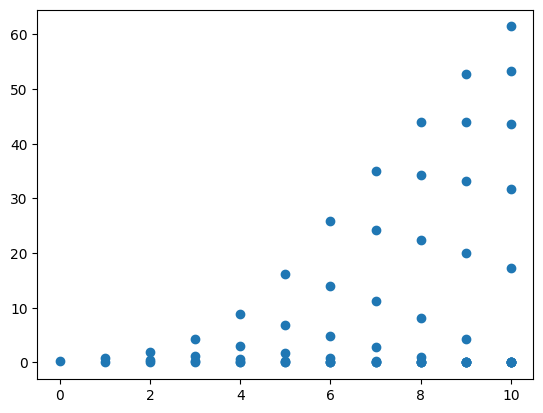

In [15]:
draw_payoffs(b_payoffs)

### American put options

In [16]:
def put_anticipated_payoffs(b_payoffs, K, stock_prices):
    intrinsic_value = np.zeros((n+1, n+1))
    intrinsic_value[:, n] = b_payoffs[:, n]
    for i in range(n-1, -1, -1):
        for j in range(n-1, -1, -1):
            if b_payoffs[i][j] != 0:
                intrinsic_value[i][j] = max(b_payoffs[i][j], K - stock_prices[i][j])
    intrinsic_value[0][0] = (1/m)*(p*intrinsic_value[1][0]+q*intrinsic_value[1][1])
    return intrinsic_value

In [17]:
b_payoffs = put_anticipated_payoffs(b_payoffs, K, stock_prices)
b_payoffs

array([[2.26757370e+00, 1.60159325e-01, 6.91924683e-02, 2.24716422e-02,
        4.17982884e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.09090909e+00, 4.47096337e-01, 2.14069722e-01,
        7.83113387e-02, 1.67573138e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.73553719e+01, 9.09090909e+00,
        6.37529386e-01, 2.66732119e-01, 6.71815945e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.48685199e+01,
        1.73553719e+01, 9.09090909e+00, 8.80023366e-01, 2.69337120e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.16986545e+01, 2.48685199e+01, 1.73553719e+01, 9.09090909e+00,
        1.07979700e+00, 0.00000000e+00, 0.00000000e+

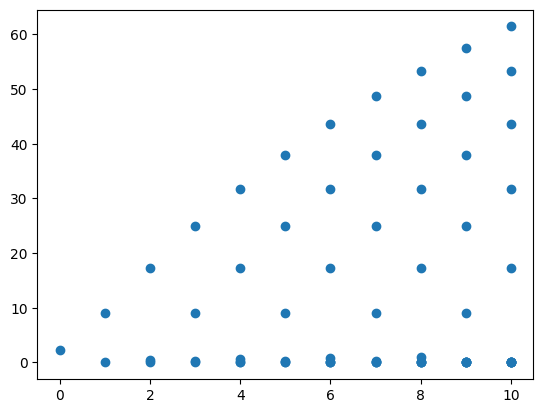

In [18]:
draw_payoffs(b_payoffs)

## Practical usage

In [19]:
r = np.log(1+r)
m = np.exp(r*dt)
sigma = 0.2
u = np.exp(sigma*np.sqrt(dt))
d = 1/u
p = (m - d)/(u-d)
q = 1-p

In [20]:
def combination(n, k):
    return math.factorial(n) / (math.factorial(k)*math.factorial(n - k))
    
def binomial_f(k, n, p):
    return combination(n, k)*(p**k)*(1-p)**(n-k)

In [21]:
def payoff(n, k, p, u, d, s0, K):
    pay = 0
    for k in range(n+1):
        if option_type == 'C':
            pay += binomial_f(k, n, p) * max(0, (u**k)*(d**(n-k))*s0 - K)
        else:
            pay += binomial_f(k, n, p) * max(0, K - (u**k)*(d**(n-k))*s0)
    return (1/m**n) * pay

In [103]:
price = payoff(n, 1, p, u, d, s0, K)
price

5.427340048130218

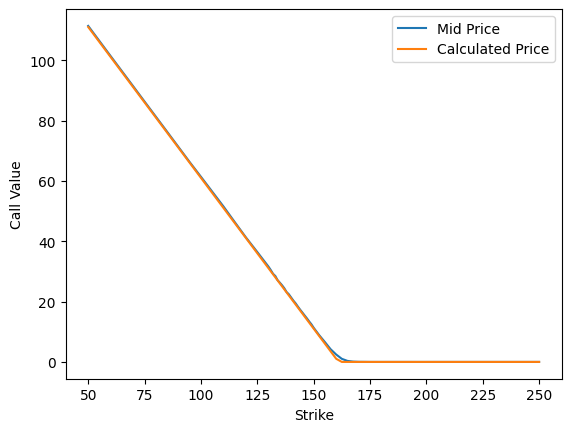

In [237]:
def binom_EU1(S0, K , T, r, sigma, N, type_ = 'call'):
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (  np.exp(r*dt) - d )  /  (  u - d )
    value = 0 
    for i in range(N+1):
        node_prob = combination(N, i)*p**i*(1-p)**(N-i)
        ST = S0*(u)**i*(d)**(N-i)
        if type_ == 'call':
            value += max(ST-K,0) * node_prob
        elif type_ == 'put':
            value += max(K-ST, 0)*node_prob

    return value*np.exp(-r*T)


def get_data(symbol, n):
    obj = yf.Ticker(symbol)
    expiry_dates = obj.options
    options = obj.option_chain(expiry_dates[n])
    df = options.calls
    df.reset_index(inplace=True)
    df['Time'] = (dt.datetime.strptime(expiry_dates[n], '%Y-%m-%d') - dt.datetime.now()).days
    df['expiration'] = dt.datetime.strptime(expiry_dates[n], '%Y-%m-%d')
    df['mid_price'] = (df.bid + df.ask) / 2
    return df

df = get_data('AAPL', 0)

prices = [] 

for row in df.itertuples():
    price = binom_EU1(161, row.strike, row.Time / 255, 0.03, 0.018 * np.sqrt(row.Time), 50, 'call')
    prices.append(price)
    
df['Price'] = prices
df['error'] = df.lastPrice - df.Price 

plt.plot(df.strike, df.mid_price, label= 'Mid Price')
plt.plot(df.strike, df.Price, label = 'Calculated Price')
plt.xlabel('Strike')
plt.ylabel('Call Value')
plt.legend()


In [197]:
df.tail()

,index,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Time,expiration,mid_price,Price,error
41,41,AAPL230428C00195000,2023-04-10 15:06:40+00:00,195.0,0.02,0.0,0.02,0.0,0.0,1.0,157,0.335944,False,REGULAR,USD,16,2023-04-28,0.010,40.558913,-40.538913
42,42,AAPL230428C00200000,2023-04-10 14:24:04+00:00,200.0,0.03,0.0,0.02,0.0,0.0,1.0,243,0.371100,False,REGULAR,USD,16,2023-04-28,0.010,37.579386,-37.549386
43,43,AAPL230428C00205000,2023-04-04 17:04:32+00:00,205.0,0.01,0.0,0.03,0.0,0.0,1.0,2,0.429693,False,REGULAR,USD,16,2023-04-28,0.015,34.659205,-34.649205
44,44,AAPL230428C00245000,2023-03-13 14:51:49+00:00,245.0,0.01,0.0,0.02,0.0,0.0,NaN,1,0.625004,False,REGULAR,USD,16,2023-04-28,0.010,14.591867,-14.581867
45,45,AAPL230428C00250000,2023-04-03 18:58:35+00:00,250.0,0.02,0.0,0.00,0.0,0.0,4.0,456,0.500005,False,REGULAR,USD,16,2023-04-28,0.000,12.690393,-12.670393


In [187]:
df

,index,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Time,expiration,mid_price,Price,error
0,0,AAPL230421C00050000,2023-04-10 15:10:29+00:00,50.0,111.25,111.30,111.85,0.0,0.0,4,1173,3.082034,True,REGULAR,USD,9,2023-04-21,111.575,122.831025,-11.581025
1,1,AAPL230421C00060000,2023-04-05 13:40:06+00:00,60.0,104.95,101.25,101.90,0.0,0.0,10,187,2.628910,True,REGULAR,USD,9,2023-04-21,101.575,115.197230,-10.247230
2,2,AAPL230421C00065000,2023-04-05 13:31:59+00:00,65.0,99.65,96.25,96.85,0.0,0.0,2,115,2.390629,True,REGULAR,USD,9,2023-04-21,96.550,111.380333,-11.730333
3,3,AAPL230421C00070000,2023-04-05 13:45:39+00:00,70.0,94.70,91.05,92.10,0.0,0.0,2,217,2.246098,True,REGULAR,USD,9,2023-04-21,91.575,107.563435,-12.863435
4,4,AAPL230421C00075000,2023-04-05 13:32:00+00:00,75.0,89.65,86.05,87.35,0.0,0.0,1,118,2.212895,True,REGULAR,USD,9,2023-04-21,86.700,103.746538,-14.096538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,AAPL230421C00270000,2023-04-10 14:24:55+00:00,270.0,0.01,0.00,0.01,0.0,0.0,5,797,0.906251,False,REGULAR,USD,9,2023-04-21,0.005,0.149525,-0.139525
57,57,AAPL230421C00275000,2023-04-05 18:35:35+00:00,275.0,0.01,0.00,0.01,0.0,0.0,2,410,0.937501,False,REGULAR,USD,9,2023-04-21,0.005,0.102557,-0.092557
58,58,AAPL230421C00280000,2023-02-10 20:55:55+00:00,280.0,0.02,0.00,0.01,0.0,0.0,2,534,0.968750,False,REGULAR,USD,9,2023-04-21,0.005,0.059096,-0.039096
59,59,AAPL230421C00290000,2023-03-31 13:30:21+00:00,290.0,0.01,0.00,0.01,0.0,0.0,5,748,1.031255,False,REGULAR,USD,9,2023-04-21,0.005,0.021311,-0.011311
